## Nombre: Sebastián Urbina

# CC3001 Primavera 2020 Tarea 3
## Multiplicación de Polinomios
## Profesores
Sección 1 Benjamin Bustos • Sección 2 Jérémy Barbay • Sección 3 Patricio Poblete / Nelson Baloian

El objetivo de esta tarea es implementar y comparar los dos algoritmos de multiplicación de polinomios que aparecen en el apunte: el algoritmo por fuerza bruta y el que utiliza la técnica de diseño "Dividir para Reinar", que de acuerdo al análisis realizado toma tiempo $\Theta(n^{1.59})$. Para esta tarea, los coeficientes a considerar son de tipo entero.

## Algoritmo cuadrático

La función ``multpol`` implementa el algoritmo de multiplicación de polinomios por fuerza bruta, que toma tiempo $\Theta(n^2)$.

In [1354]:
import numpy as np

def multpol(a, b):
    '''
    multpol: array array -> array
    Recibe dos arreglos, a y b, que contienen los coeficientes de los polinomios
    (valores enteros), y devuelve un arreglo con los coeficientes resultantes de
    multiplicar ambos polinomios. Ambos arreglos deben tener el mismo largo
    Ejemplo: 
    Sea pol1 = [-1, 2, -3, 4] el arreglo que representa al polinomio -1 + 2x -3x**2 + 4x**3
    Sea pol2 = [0, 0, 0, 2] el arreglo que representa al polinomio 2x**3
    multpol(pol1, pol2) devuelve el arreglo [0, 0, 0, -2, 4, -6, 8], que corresponde al
    polinomio -2x**3 + 4x**4 - 6x**5 + 8x**6
    '''
    n = len(a)
    assert len(b) == n
    c = np.zeros(2 * n - 1, dtype = int)
    for i in range(0, n):
        for j in range(0, n):
            c[i + j] += a[i] * b[j]
    return c

# Test
pol1 = np.array([-1, 2, -3, 4], dtype = int)
pol2 = np.array([0, 0, 0, 2], dtype = int)
resultado = np.array([0, 0, 0, -2, 4, -6, 8], dtype = int)
assert np.array_equal(multpol(pol1, pol2), resultado)

In [1355]:
multpol(np.array([2, 3, -6, 1, 2, 0, 4, 1], dtype = int), np.array([1, -1, 3, 1, 4, -2, 0, 2], dtype = int))

array([  2,   1,  -3,  18,  -6,   3, -19,  19,  23,  -9,  19,   0,  -2,
         8,   2])

## Algoritmo basado en Dividir para Reinar

A continuación, implemente el algoritmo de multiplicación de polinomios que utiliza tres multiplicaciones recursivas, que toma tiempo $\Theta(n^{1.59})$. Para implementar este algoritmo, puede suponer que el tamaño de los arreglos es siempre una potencia de 2.

In [1420]:
import numpy as np

def multpol2(a, b):
    '''
    multpol2: array array -> array
    Recibe dos arreglos, a y b, que contienen los coeficientes de los polinomios
    (valores enteros), y devuelve un arreglo con los coeficientes resultantes de
    multiplicar ambos polinomios. Utiliza el algoritmo recursivo basado en
    Dividir para Reinar visto en catedra, que realiza tres llamados recursivos.
    Ambos arreglos deben tener el mismo largo
    Ejemplo: 
    Sea pol1 = [2, 3, -6, 1, 2, 0, 4, 1] el arreglo que representa al
    polinomio 2 + 3x - 6x**2 + x**3 + 2x**4 + 4x**6 + x**7
    Sea pol2 = [1, -1, 3, 1, 4, -2, 0, 2] el arreglo que representa al
    polinomio 1 - x + 3x**2 + x**3 + 4x**4 - 2x**5 + 2x**7
    multpol(pol1, pol2) devuelve el arreglo
    [2, 1, -3, 18, -6, 3, -19, 19, 23, -9, 19, 0, -2, 8, 2], que corresponde al
    polinomio 2 + x - 3x**2 + 18x**3 - 6x**4 + 3x**5 - 19x**6 + 19x**7 + 23x**8 - 
    9x**9 + 19x**10 - 2x**12 + 8x*13 + 2x**14 
    '''
    # Implemente su algoritmo aqui
    n = len(a)
    assert len(b) == n #nos aseguramos que tengan las mismas dimensiones
    assert n>0 #el arreglo debe contener al menos un elemento
    c = np.zeros(2 * n - 1, dtype = int) #arreglo vacío para ir guardando los resultados
    if n == 1:
        return  a[0]*b[0] #caso base
    A1 = a[0:n//2] #subdividimos el problema en polinomios mas pequeños de grados n/2
    A2 = a[n//2:n]
    B1 = b[0:n//2]
    B2 = b[n//2:n]
    D = multpol2(A1+A2,B1+B2) #calculamos las multiplicaciones recursivas
    E = multpol2(A1,B1)
    F = multpol2(A2,B2)
    c[0:n-1] = E #guardamos las multiplicaciones
    c[n:2*n-1] = F
    c[n//2:3*(n//2)-1] += D-E-F
    
    return c

# # Tests
pol1 = np.array([-1, 2, -3, 4], dtype = int)
pol2 = np.array([0, 0, 0, 2], dtype = int)
resultado = np.array([0, 0, 0, -2, 4, -6, 8], dtype = int)
assert np.array_equal(multpol2(pol1, pol2), resultado)
pol1 = np.array([2,3,-6,1,2,0,4,1], dtype = int)
pol2 = np.array([1,-1,3,1,4,-2,0,2], dtype = int)
resultado = np.array([2, 1, -3, 18, -6, 3, -19, 19, 23, -9, 19, 0, -2, 8, 2], dtype = int)
assert np.array_equal(multpol2(pol1, pol2), resultado)

Ahora, muestre ejemplos de uso de su función ``multpol2``, mostrando el resultado para al menos cuatro ejemplos distintos de multiplicaciones de polinomios, con grados de polinomios distintos para cada ejemplo.

In [1394]:
# Implemente sus ejemplos de uso aquí
ks = [3,4,5,6] #potencias a testear
for i,k in enumerate(ks):
    n = 2**k 
    pol1 = np.random.randint(-100,100,size = n) #generamos polinomios aleatorios
    pol2 = np.random.randint(-100,100,size = n)
    print("\nEjemplo {}:\n n = {}\n".format(i+1,n))
    print(pol1,"X",pol2,"\n")
    print("Resultado = ",multpol2(pol1,pol2))


Ejemplo 1:
 n = 8

[-11 -46  29  -6 -42  -9  -7  93] X [-14 -31  26  39  88  69  99 -57] 

Resultado =  [  154   985   734 -2440 -1234 -2404 -2660 -5411 -2033 -3792 -1426  9204
  6237  9606 -5301]

Ejemplo 2:
 n = 16

[-29 -10 -35 -43  91 -65  69  90 -89 -56 -41 -49  68 -72 -77 -83] X [-16  20 -35 -52  34  33  41  83  81  11 -93 -65  67  69   7  11] 

Resultado =  [   464   -420   1375   1846  -1557   4888  -6062  -7951   1250 -12626
  -1914  15724   8517  10274  -3493 -11436  -6491 -15839  -3165  15239
    565 -16160 -23301 -12777  11200  11798  -4795 -10630  -7058  -1428
   -913]

Ejemplo 3:
 n = 32

[ -3  48 -53 -15  -4  63 -46  63  45 -81 -18  45  88  86  94 -82  34  33
  57  14  93  26  36 -36 -95 -59  -7  -3  26  45 -84 -40] X [ 97 -15 -88 -34  30  43  12 -80  26 -69 -13  55 -50  90 -28 -80 -91  11
  86   9   1  58 -54  50  26   1  63 -77 -29  67  92  74] 

Resultado =  [  -291   4701  -5597  -4782   2779  10604  -4107   -520      7  -5279
  -8803  13699  15076   4139  -9231 -25

# Comparación de ambos algoritmos para $n$ grande

La función ``%timeit`` de Python permite medir el tiempo tomado para la ejecución de una función. Por ejemplo, el siguiente código genera dos polinomios representados por arreglos aleatorios de tamaño $n$, y luego calcula cuánto demora en ejecutarse la función ``multpol`` para multiplicar ambos polinomios.

Implemente ahora un experimento para descubrir a partir de qué valor de $n$ la función ``multpol2`` es más eficiente que la función ``multpol``. Utilice valores de $n$ que sean potencias de 2 para realizar este experimento. Pruebe con al menos diez valores distintos de $n$.

## Solución

Crearemos un script que vaya guardando los tiempos de ejecución de ``timeit``, para luego crear un gráfico y analizar sobre cuál $n$ un algoritmo se vuelve más eficiente que otro.

Utilicé como referencia: https://stackoverflow.com/questions/33943362/timeit-equivalent-in-code

5.03 µs ± 447 ns per loop (mean ± std. dev. of 7 runs, 10 loops each)
29.9 µs ± 7.41 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
28.8 µs ± 3.82 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
126 µs ± 25.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
109 µs ± 18.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
269 µs ± 87.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
201 µs ± 47.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
515 µs ± 50.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
717 µs ± 48.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
2.6 ms ± 1.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
2.82 ms ± 168 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
5.26 ms ± 741 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
12.5 ms ± 1.85 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
16 ms ± 569 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
46 ms ± 2.53 ms per 

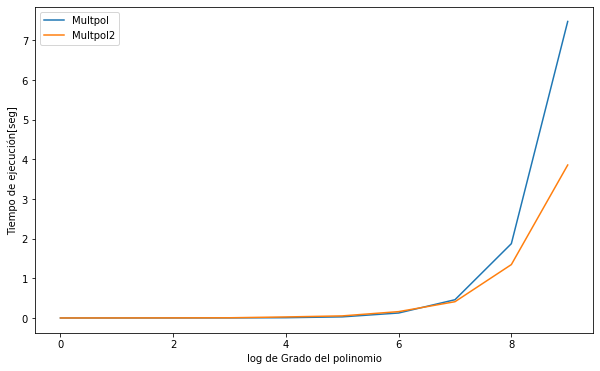

In [1423]:
import matplotlib.pyplot as plt
n_valores = 10 #Cantidad de valores distintos
ns = [2**i for i in range(1,n_valores+1)] #grados de los 10 polinomios a testear
r1 = []
r2 = []
for n in ns:
    a = np.random.randint(-10, 10, n)
    b = np.random.randint(-10, 10, n)
    t1 = %timeit -n 10 -o multpol(a,b) #seteamos el timeint en 10 bucles por cada ejecucion(para que no demore tanto)
    t2 = %timeit -n 10 -o multpol2(a,b) 
    r1.append(t1) #guardamos los objetos timeit de multpol
    r2.append(t2) #guardamos los objetos timeit de multpol2

res1 = []
res2 = []
for i in range(len(r1)):
    mean1 = np.mean(r1[i].all_runs) #Calculamos el promedio de todas las ejecuciones para cada multiplicación de polinomios
    mean2 = np.mean(r2[i].all_runs)
    res1.append(mean1) #guardamos
    res2.append(mean2) 
    
#Graficamos los resultados de tiempo de ejecucion
plt.figure(figsize=(10,6)) 
plt.plot(res1,label="Multpol")
plt.plot(res2,label="Multpol2")
plt.xlabel("log de Grado del polinomio")
plt.ylabel("Tiempo de ejecución[seg]")
plt.legend()
plt.show()

Podemos notar gráficamente que a partir de un polinomio de grado $2^{7} = 128$, la función ``multpol2`` comienza a ser más eficiente que ``multpol``. El método utilizado parece ser confiable, pues realiza multiples ejecuciones, de donde se utilizó el promedio de éstas para comparar los resultados.